# Wall-Following navigation task with mobile robot SCITOS-G5
For Each Attribute: 

   -- File sensor_readings_24.data:
   
	 1. US1: ultrasound sensor at the front of the robot (reference angle: 180°) - (numeric: real)
	 2. US2: ultrasound reading (reference angle: -165°) - (numeric: real)
	 3. US3: ultrasound reading (reference angle: -150°) - (numeric: real)
	 4. US4: ultrasound reading (reference angle: -135°) - (numeric: real)
	 5. US5: ultrasound reading (reference angle: -120°) - (numeric: real)
	 6. US6: ultrasound reading (reference angle: -105°) - (numeric: real)
	 7. US7: ultrasound reading (reference angle: -90°) - (numeric: real)
	 8. US8: ultrasound reading (reference angle: -75°) - (numeric: real)
	 9. US9: ultrasound reading (reference angle: -60°) - (numeric: real)
	10. US10: ultrasound reading (reference angle: -45°) - (numeric: real)
	11. US11: ultrasound reading (reference angle: -30°) - (numeric: real)
	12. US12: ultrasound reading (reference angle: -15°) - (numeric: real)
	13. US13: reading of ultrasound sensor situated at the back of the robot (reference angle: 0°) - (numeric: real)
	14. US14: ultrasound reading (reference angle: 15°) - (numeric: real)
	15. US15: ultrasound reading (reference angle: 30°) - (numeric: real)
	16. US16: ultrasound reading (reference angle: 45°) - (numeric: real)
	17. US17: ultrasound reading (reference angle: 60°) - (numeric: real)
	18. US18: ultrasound reading (reference angle: 75°) - (numeric: real)
	19. US19: ultrasound reading (reference angle: 90°) - (numeric: real)
	20. US20: ultrasound reading (reference angle: 105°) - (numeric: real)
	21. US21: ultrasound reading (reference angle: 120°) - (numeric: real)
	22. US22: ultrasound reading (reference angle: 135°) - (numeric: real)
	23. US23: ultrasound reading (reference angle: 150°) - (numeric: real)
	24. US24: ultrasound reading (reference angle: 165°) - (numeric: real)
   	25. Class: 
      		-- Move-Forward
      		-- Slight-Right-Turn
      		-- Sharp-Right-Turn
      		-- Slight-Left-Turn


# importing library for reading, writing and perform basic operations

In [1]:
import pandas as pd
import numpy as np

#Importing library for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Filter the unwanted warning
import warnings
warnings.simplefilter("ignore")
#Importing library for splitting model into train and test and for data transformation
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,recall_score,precision_score,confusion_matrix,roc_auc_score,classification_report

In [2]:
df=pd.read_csv(r"C:\Users\TRUPTI\Desktop\MLProject\wall+following+robot+navigation+data\sensor_readings_24.csv",header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn


# Basic Description of dataframe

In [4]:
#Dimension of dataset.

df.shape

(5456, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5456 non-null   float64
 1   1       5456 non-null   float64
 2   2       5456 non-null   float64
 3   3       5456 non-null   float64
 4   4       5456 non-null   float64
 5   5       5456 non-null   float64
 6   6       5456 non-null   float64
 7   7       5456 non-null   float64
 8   8       5456 non-null   float64
 9   9       5456 non-null   float64
 10  10      5456 non-null   float64
 11  11      5456 non-null   float64
 12  12      5456 non-null   float64
 13  13      5456 non-null   float64
 14  14      5456 non-null   float64
 15  15      5456 non-null   float64
 16  16      5456 non-null   float64
 17  17      5456 non-null   float64
 18  18      5456 non-null   float64
 19  19      5456 non-null   float64
 20  20      5456 non-null   float64
 21  21      5456 non-null   float64
 22  

In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
count,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000,...,5456.000000,5456.000000,5456.000000,5456.000000,5456.00000,5456.000000,5456.000000,5456.000000,5456.000000,5456.000000
mean,1.471617,2.327043,2.489347,2.796501,2.958552,2.893073,3.351113,2.540397,3.125621,2.832386,...,2.205772,1.202111,0.989831,0.910273,1.05811,1.076320,1.015923,1.778034,1.555045,1.578508
std,0.802801,1.410146,1.247435,1.309368,1.339225,1.282575,1.413692,1.111554,1.356965,1.307843,...,1.715435,1.098568,0.942075,0.889527,1.14463,1.141498,0.887439,1.571686,1.291447,1.150480
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,...,0.495000,0.424000,0.373000,0.354000,0.34000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.921000,1.362000,1.538750,1.731000,1.774000,1.785750,1.930750,1.618000,1.799750,1.636000,...,0.860000,0.690000,0.581000,0.529750,0.52300,0.541750,0.567000,0.743000,0.792000,0.884000
50%,1.335000,1.904500,2.064000,2.458000,2.667000,2.682500,3.225500,2.172000,2.802000,2.679000,...,1.328500,0.803000,0.738000,0.685000,0.69100,0.693000,0.764000,1.030500,1.071000,1.289000
75%,1.814000,2.681500,2.739250,4.093500,4.314500,3.835250,5.000000,3.193000,5.000000,3.526250,...,4.436250,1.159000,0.913000,0.837000,0.85700,0.863000,1.002250,2.068250,1.559500,1.657250
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

In [8]:
# Generating final dataset
new_df=df

In [9]:
#Creating column names

final_df_columns=["US1(angle:-180°)","US2(angle:-165°)","US3(angle:-150°)","US4(angle:-135°)","US5(angle:-120°)","US6(angle:-105°)",
        "US7(angle:-90°)","US8(angle:-75°)","US9(angle:-60°)","US10(angle:-45°)","US11(angle:-30°)",
                  "US12(angle:-15°)","US13(angle:0°)","US14(angle:+15°)","US15(angle:+30°)","US16(angle:+45°)",
        "US17(angle:+60°)","US18(angle:+75°)","US19(angle:+90°)","US20(angle:+105°)","US21(angle:+120°)",
                  "US22(angle:+135°)","US23(angle:+150°)","US24(angle:+165°)","CLASS"]

In [10]:
#Adding Column names to dataset
new_df.columns=final_df_columns
new_df.to_csv("new data with target class.csv")
new_df.head()

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),...,US16(angle:+45°),US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°),CLASS
0,0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn


* As our dataframe is completely cleaned and preprocessed. we will remove the target attribute and store our final dataframe.

In [11]:
target=new_df["CLASS"]
final_df = new_df.drop(columns ="CLASS")

In [12]:
final_df.shape

(5456, 24)

# Exploratory Data Analysis (EDA)
Analyzing data sets to summarize their main characteristics.

In [13]:
#List with class names

class_names = ["Move-Forward",
               "Slight-Right-Turn",
               "Sharp-Right-Turn",
               "Slight-Left-Turn"]

In [14]:
# Values count based on class 
new_df["CLASS"].value_counts(sort=False)


CLASS
Slight-Right-Turn     826
Sharp-Right-Turn     2097
Move-Forward         2205
Slight-Left-Turn      328
Name: count, dtype: int64

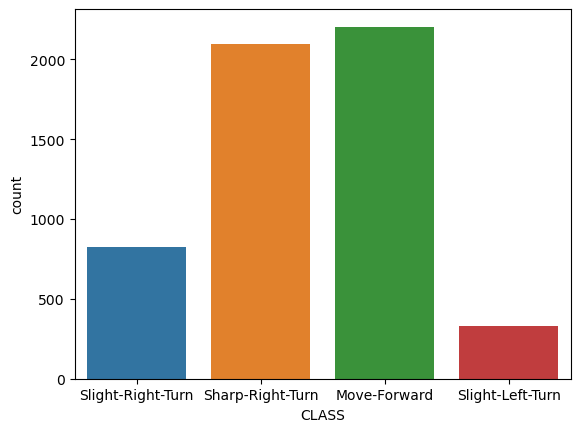

In [15]:
sns.countplot(x ='CLASS',data =new_df) 
plt.show() 

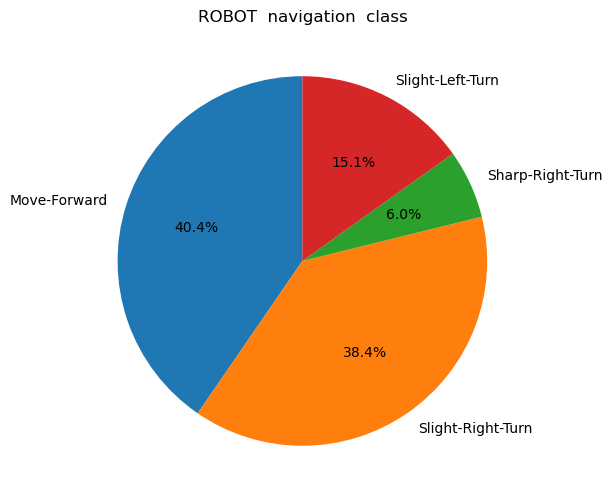

In [16]:
plt.figure(figsize=(6,6))
#a=np.random.random(4)
#cs=cm.Set1(np.arange(4)/7.)
plt.pie(new_df["CLASS"].value_counts().sort_index(),labels=class_names,autopct='%1.1f%%',startangle=90) 
plt.title("ROBOT  navigation  class") 
plt.show() #displaying the plot

<Axes: >

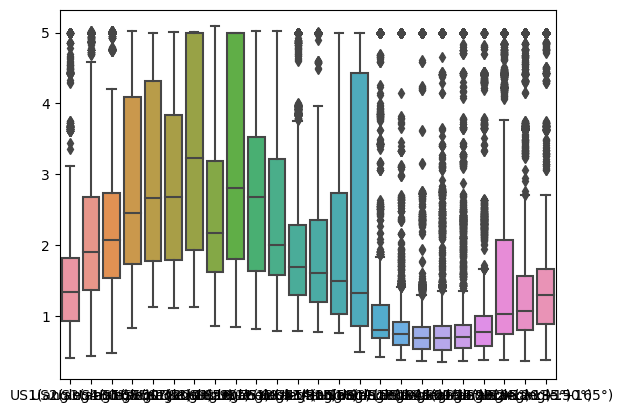

In [17]:
sns.boxplot(data=new_df)

In [18]:
for i in new_df:                  # i = column name 
    if new_df[i].dtypes in ("float64","int64"): # df[i] = every column will select float & int column only
        q1 = new_df[i].quantile(0.25)  # for 1 column compute q1
        q3 = new_df[i].quantile(0.75)  # for 1 column compute q3
        iqr = q3-q1  # for 1 column compute IQR
        ul = q3 + 1.5*iqr # for 1 column compute UPPER LIMIT
        ll = q1 - 1.5*iqr # for 1 column compute LOWER LIMIT 
        new_df[i].clip(upper=ul,lower=ll,inplace=True)

<Axes: >

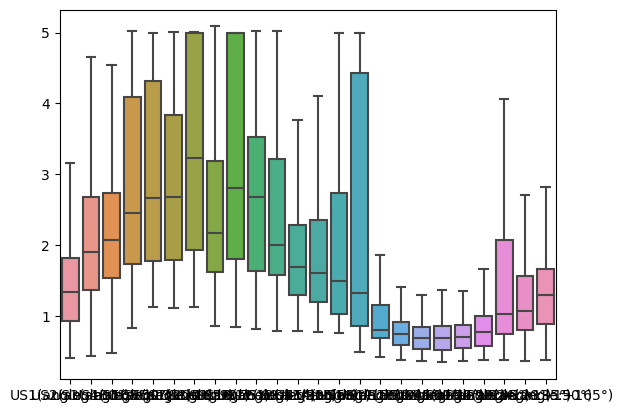

In [19]:
sns.boxplot(data=new_df)

In [20]:
Correlation = final_df.corr()
Correlation.style.applymap(lambda x: 'background-color : yellow' if x > 0.7 else '')

,US1(angle:-180°),US2(angle:-165°),US3(angle:-150°),US4(angle:-135°),US5(angle:-120°),US6(angle:-105°),US7(angle:-90°),US8(angle:-75°),US9(angle:-60°),US10(angle:-45°),US11(angle:-30°),US12(angle:-15°),US13(angle:0°),US14(angle:+15°),US15(angle:+30°),US16(angle:+45°),US17(angle:+60°),US18(angle:+75°),US19(angle:+90°),US20(angle:+105°),US21(angle:+120°),US22(angle:+135°),US23(angle:+150°),US24(angle:+165°)
US1(angle:-180°),1.000000,0.227981,0.140681,0.057997,0.019948,-0.113879,-0.284184,-0.193975,-0.305249,-0.279354,-0.207491,-0.235220,-0.157099,-0.220978,-0.135658,0.065822,0.137558,0.163184,0.185377,0.181525,0.280650,0.341608,0.382660,0.468430
US2(angle:-165°),0.227981,1.000000,0.323046,0.163488,0.149413,0.048565,-0.055028,-0.008596,-0.052476,-0.092430,-0.219792,-0.147006,-0.206211,-0.118625,-0.061509,-0.031577,-0.064508,-0.032970,0.028959,0.072769,0.053314,-0.001614,0.057817,0.105036
US3(angle:-150°),0.140681,0.323046,1.000000,0.396655,0.329760,0.161001,-0.072938,-0.186465,-0.220046,-0.179122,-0.157230,-0.235032,-0.182399,-0.162224,-0.133359,-0.019796,-0.069217,-0.103051,-0.063635,-0.006546,-0.010129,0.130244,0.112309,0.076078
US4(angle:-135°),0.057997,0.163488,0.396655,1.000000,0.626803,0.315309,-0.067964,-0.127967,-0.169434,-0.115552,-0.116770,-0.165835,-0.145734,-0.308163,-0.271507,0.022011,-0.120829,-0.181193,-0.189575,-0.094104,-0.073197,0.270021,0.161952,0.079978
US5(angle:-120°),0.019948,0.149413,0.329760,0.626803,1.000000,0.489932,0.077817,-0.002550,-0.170375,-0.100226,-0.123872,-0.104604,-0.091065,-0.280737,-0.323145,-0.051745,-0.161187,-0.222219,-0.248406,-0.195669,-0.153191,0.114636,0.115356,0.087500
US6(angle:-105°),-0.113879,0.048565,0.161001,0.315309,0.489932,1.000000,0.382777,0.200489,0.114697,-0.019028,-0.147906,-0.163720,-0.137650,-0.153418,-0.186635,-0.147336,-0.213275,-0.250157,-0.251119,-0.228092,-0.215363,-0.103676,-0.097973,-0.081810
US7(angle:-90°),-0.284184,-0.055028,-0.072938,-0.067964,0.077817,0.382777,1.000000,0.406891,0.432018,0.256569,0.098363,0.031076,0.024852,0.089082,0.093002,-0.142813,-0.201018,-0.220990,-0.272319,-0.240093,-0.273235,-0.372338,-0.235191,-0.259634
US8(angle:-75°),-0.193975,-0.008596,-0.186465,-0.127967,-0.002550,0.200489,0.406891,1.000000,0.536807,0.551395,0.292638,0.003404,-0.011000,-0.021795,-0.064063,-0.124273,-0.193578,-0.209798,-0.265394,-0.246415,-0.278243,-0.258908,-0.171624,-0.143237
US9(angle:-60°),-0.305249,-0.052476,-0.220046,-0.169434,-0.170375,0.114697,0.432018,0.536807,1.000000,0.564116,0.262173,-0.012491,0.018771,0.032239,0.127596,-0.117984,-0.232477,-0.264316,-0.269450,-0.156058,-0.189301,-0.271245,-0.273312,-0.334902
US10(angle:-45°),-0.279354,-0.092430,-0.179122,-0.115552,-0.100226,-0.019028,0.256569,0.551395,0.564116,1.000000,0.469736,0.128584,0.065392,-0.001732,0.039170,-0.030759,-0.199329,-0.239952,-0.297213,-0.224384,-0.210885,-0.179306,-0.208651,-0.263427


In [21]:
# Model

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, target ,test_size=0.3, random_state=1)

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [24]:
result = pd.DataFrame(columns=['Model','Train Accuracy','Test Accuracy'])

# KNN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier()
knnclassifier.fit(X_train, y_train)
y_pred = knnclassifier.predict(X_test)

In [26]:
knn_train_accuracy = accuracy_score(y_train, knnclassifier.predict(X_train))
knn_test_accuracy = accuracy_score(y_test, knnclassifier.predict(X_test))

result = result._append(pd.Series({'Model':'KNN Classifier','Train Accuracy':knn_train_accuracy,'Test Accuracy':knn_test_accuracy}),ignore_index=True)
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.905473,0.842395


In [27]:
print(classification_report(y_pred,y_test))

                   precision    recall  f1-score   support

     Move-Forward       0.83      0.82      0.83       648
 Sharp-Right-Turn       0.88      0.88      0.88       661
 Slight-Left-Turn       0.89      0.86      0.87        99
Slight-Right-Turn       0.75      0.79      0.77       229

         accuracy                           0.84      1637
        macro avg       0.84      0.84      0.84      1637
     weighted avg       0.84      0.84      0.84      1637



# Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
lgclassifier = LogisticRegression() 
lgclassifier.fit(X_train, y_train) 
y_pred = lgclassifier.predict(X_test)

In [29]:
lg_train_recall = recall_score(y_train, lgclassifier.predict(X_train),average='weighted')
lg_test_recall = recall_score(y_test, lgclassifier.predict(X_test),average='weighted')
lg_train_accuracy = accuracy_score(y_train, lgclassifier.predict(X_train))
lg_test_accuracy = accuracy_score(y_test, lgclassifier.predict(X_test))
result = result._append(pd.Series({'Model':'Logestic Regression','Train Accuracy':lg_train_accuracy,'Test Accuracy':lg_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.905473,0.842395
1,Logestic Regression,0.713799,0.700672


In [30]:
print(classification_report(y_pred,y_test))

                   precision    recall  f1-score   support

     Move-Forward       0.70      0.73      0.72       611
 Sharp-Right-Turn       0.77      0.70      0.73       726
 Slight-Left-Turn       0.54      0.67      0.60        78
Slight-Right-Turn       0.58      0.63      0.60       222

         accuracy                           0.70      1637
        macro avg       0.65      0.68      0.66      1637
     weighted avg       0.71      0.70      0.70      1637



# Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier 
dtclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=4)
dtclassifier.fit(X_train, y_train) 
y_pred_test = dtclassifier.predict(X_test)
y_pred_train = dtclassifier.predict(X_train)

In [32]:
dt_train_accuracy = accuracy_score(y_train,y_pred_train )
dt_test_accuracy = accuracy_score(y_test, y_pred_test)
result = result._append(pd.Series({'Model':'Decision Tree Classifier','Train Accuracy':dt_train_accuracy,'Test Accuracy':dt_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.905473,0.842395
1,Logestic Regression,0.713799,0.700672
2,Decision Tree Classifier,0.913852,0.909591


# Random forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=50, criterion='entropy',max_features=100,max_depth=4,max_leaf_nodes=30)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=100,
                       max_leaf_nodes=30, n_estimators=50)

In [34]:
y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

rf_train_accuracy_score = accuracy_score(y_train, y_pred_train)
rf_test_accuracy_score = accuracy_score(y_test, y_pred_test)

result = result._append(pd.Series({'Model':'Random Forest Classifier','Train Accuracy':rf_train_accuracy_score,'Test Accuracy':rf_test_accuracy_score}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.905473,0.842395
1,Logestic Regression,0.713799,0.700672
2,Decision Tree Classifier,0.913852,0.909591
3,Random Forest Classifier,0.913852,0.911423


# PCA

In [35]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train , test_size=0.3, random_state=10)

In [36]:
scaler = StandardScaler()
scaler.fit(X_train1)
X_train1 = scaler.transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [37]:
from sklearn.decomposition import PCA
pca = PCA(.98)
pca.fit(X_train1)

pca.n_components_

23

In [38]:
X_train1 = pca.transform(X_train1)
X_test1 = pca.transform(X_test1)

# KNN Classifier with PCA

In [39]:
classifier = KNeighborsClassifier()
classifier.fit(X_train1, y_train1)
Y_pred = classifier.predict(X_test1)

In [40]:
knnp_train_accuracy = accuracy_score(y_train1,classifier.predict(X_train1))
knnp_test_accuracy = accuracy_score(y_test1,Y_pred)
#print(knnp_train_accuracy,knnp_test_accuracy)
result = result._append(pd.Series({'Model':'KNN with PCA','Train Accuracy':knnp_train_accuracy,'Test Accuracy':knnp_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.905473,0.842395
1,Logestic Regression,0.713799,0.700672
2,Decision Tree Classifier,0.913852,0.909591
3,Random Forest Classifier,0.913852,0.911423
4,KNN with PCA,0.893004,0.831588


In [41]:
print(classification_report(Y_pred,y_test1))

                   precision    recall  f1-score   support

     Move-Forward       0.87      0.81      0.84       513
 Sharp-Right-Turn       0.79      0.89      0.83       393
 Slight-Left-Turn       0.87      0.88      0.87        59
Slight-Right-Turn       0.81      0.75      0.78       181

         accuracy                           0.83      1146
        macro avg       0.84      0.83      0.83      1146
     weighted avg       0.83      0.83      0.83      1146



# Logistic Regression with PCA

In [42]:
from sklearn.linear_model import LogisticRegression
lgpclassifier = LogisticRegression(C=10,random_state = 0) 
lgpclassifier.fit(X_train1, y_train1) 
y_pred_train1 = lgpclassifier.predict(X_train1)
y_pred_test1 = lgpclassifier.predict(X_test1)

In [43]:
lgp_train_accuracy = accuracy_score(y_train1,y_pred_train1)
lgp_test_accuracy = accuracy_score(y_test1,y_pred_test1)
#print(lgp_train_accuracy,knnp_test_accuracy)
result = result._append(pd.Series({'Model':'Logestic Regression PCA','Train Accuracy':lgp_train_accuracy,'Test Accuracy':lgp_test_accuracy}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.905473,0.842395
1,Logestic Regression,0.713799,0.700672
2,Decision Tree Classifier,0.913852,0.909591
3,Random Forest Classifier,0.913852,0.911423
4,KNN with PCA,0.893004,0.831588
5,Logestic Regression PCA,0.733633,0.717277


In [44]:
print(classification_report(y_pred_test1,y_test1))

                   precision    recall  f1-score   support

     Move-Forward       0.77      0.75      0.76       490
 Sharp-Right-Turn       0.74      0.71      0.72       460
 Slight-Left-Turn       0.45      0.57      0.50        47
Slight-Right-Turn       0.61      0.68      0.65       149

         accuracy                           0.72      1146
        macro avg       0.64      0.68      0.66      1146
     weighted avg       0.72      0.72      0.72      1146



# Decision Tree Classifier with PCA

In [45]:
from sklearn.tree import DecisionTreeClassifier 
dtpclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=5)
dtpclassifier.fit(X_train1, y_train1) 
y_pred_test = dtpclassifier.predict(X_test1)
y_pred_train = dtpclassifier.predict(X_train1)

In [46]:
dtp_train_recall_score = recall_score(y_train1, y_pred_train, average='weighted')
dtp_test_recall_score = recall_score(y_test1, y_pred_test, average='weighted')

dtp_train_accuracy_score = accuracy_score(y_train1, y_pred_train)
dtp_test_accuracy_score = accuracy_score(y_test1, y_pred_test)
result = result._append(pd.Series({'Model':'Decision Tree with PCA','Train Accuracy':dtp_train_accuracy_score,'Test Accuracy':dtp_test_accuracy_score}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.905473,0.842395
1,Logestic Regression,0.713799,0.700672
2,Decision Tree Classifier,0.913852,0.909591
3,Random Forest Classifier,0.913852,0.911423
4,KNN with PCA,0.893004,0.831588
5,Logestic Regression PCA,0.733633,0.717277
6,Decision Tree with PCA,0.717920,0.657941


# Random Forest with PCA

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfp_clf = RandomForestClassifier(n_estimators=50, criterion='entropy',max_features=100,max_depth=4,max_leaf_nodes=30)
rfp_clf.fit(X_train1, y_train1)

RandomForestClassifier(criterion='entropy', max_depth=4, max_features=100,
                       max_leaf_nodes=30, n_estimators=50)

In [48]:
y_pred_train1 = rfp_clf.predict(X_train1)
y_pred_test1 = rfp_clf.predict(X_test1)
rfp_train_accuracy_score = accuracy_score(y_train1, y_pred_train1)
rfp_test_accuracy_score = accuracy_score(y_test1, y_pred_test1)

In [49]:
result = result._append(pd.Series({'Model':'Random Forest with PCA','Train Accuracy':rfp_train_accuracy_score,'Test Accuracy':rfp_test_accuracy_score}),ignore_index=True )
result

,Model,Train Accuracy,Test Accuracy
0,KNN Classifier,0.905473,0.842395
1,Logestic Regression,0.713799,0.700672
2,Decision Tree Classifier,0.913852,0.909591
3,Random Forest Classifier,0.913852,0.911423
4,KNN with PCA,0.893004,0.831588
5,Logestic Regression PCA,0.733633,0.717277
6,Decision Tree with PCA,0.717920,0.657941
7,Random Forest with PCA,0.700711,0.674520


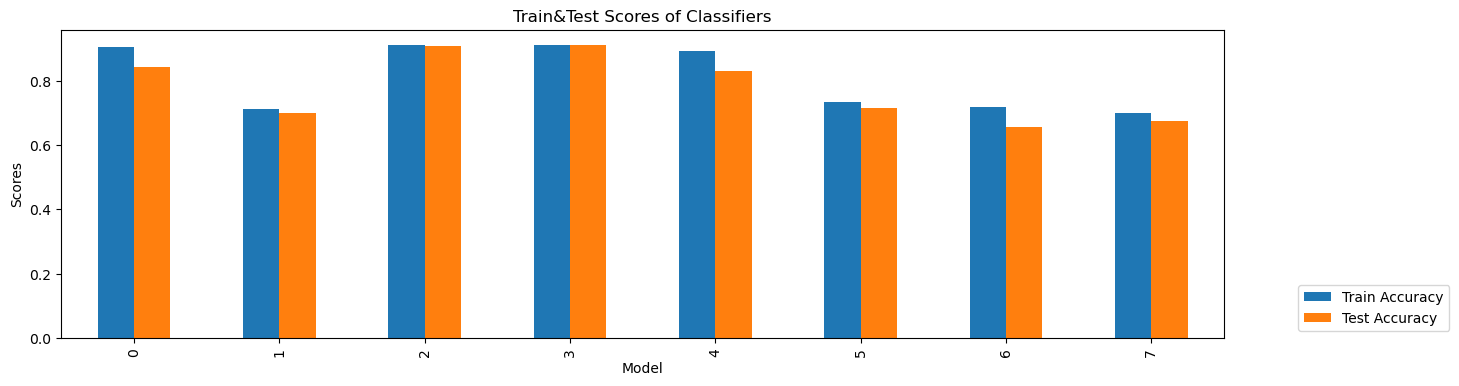

In [50]:

result.plot(kind="bar",figsize=(15,4))
plt.title('Train&Test Scores of Classifiers')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show();

Result:
Four types of movement applied which are common in rob0t farward classfied using machine learning algorithms like RandomForest , DecisionTree classification and Logistric Regression Algorithms. we obtained the maximum accuracy with Logistric Regression.we found out thatLogistric Regression Algorithms is most suitable for working with sequence data out of other three algorithms.
The models started performing worst after we applied PCA on the resampled data. The reason behind this is, PCA reduces the complexity of the data. It creates components based on giving importance to variables with large variance and also the components which it creates are non collinear in nature which means it takes care of collinearity in large data set. PCA also improves the overall execution time and quality of the models and it is very beneficial when we are working with huge amount of variables.

